In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('../data/nyc_taxi_sample.csv')
df

,pickup_datetime,dropoff_datetime,passenger_count
0,2023-01-01 08:00:00,2023-01-01 08:25:00,2
1,2023-01-01 09:15:00,2023-01-01 09:45:00,1
2,2023-01-01 10:30:00,2023-01-01 10:50:00,3


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pickup_datetime   3 non-null      object
 1   dropoff_datetime  3 non-null      object
 2   passenger_count   3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [25]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['trip_duration_minutes'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60


In [26]:
def add_trip_duration(df: pd.DataFrame) -> pd.DataFrame:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
    df['trip_duration_minutes'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60
    return df

In [27]:
df = add_trip_duration(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pickup_datetime        3 non-null      datetime64[ns]
 1   dropoff_datetime       3 non-null      datetime64[ns]
 2   passenger_count        3 non-null      int64         
 3   trip_duration_minutes  3 non-null      float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 228.0 bytes


In [28]:
df['trip_duration_minutes'].describe()

count     3.0
mean     25.0
std       5.0
min      20.0
25%      22.5
50%      25.0
75%      27.5
max      30.0
Name: trip_duration_minutes, dtype: float64

In [29]:
def compute_summary_stats(df: pd.DataFrame) -> pd.Series:
    return df['trip_duration_minutes'].describe()

summary_stats = compute_summary_stats(df)
summary_stats

count     3.0
mean     25.0
std       5.0
min      20.0
25%      22.5
50%      25.0
75%      27.5
max      30.0
Name: trip_duration_minutes, dtype: float64

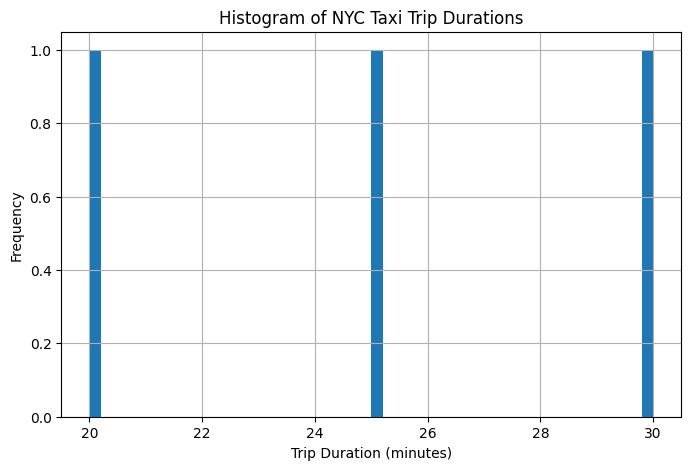

In [30]:
plt.figure(figsize=(8, 5))
bins: int = 50
df['trip_duration_minutes'].hist(bins=bins)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of NYC Taxi Trip Durations')
plt.show()

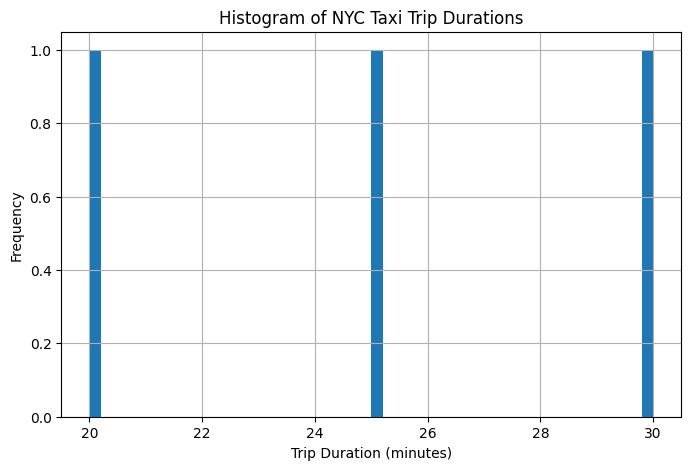

In [31]:
def plot_trip_duration_histogram(df: pd.DataFrame, bins: int = 50) -> None:
    plt.figure(figsize=(8, 5))
    df['trip_duration_minutes'].hist(bins=bins)
    plt.xlabel('Trip Duration (minutes)')
    plt.ylabel('Frequency')
    plt.title('Histogram of NYC Taxi Trip Durations')
    plt.show()

plot_trip_duration_histogram(df, bins=50)